In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sng

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
 
## For Dimension Reduction 
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:

### Creating empty list name as wcss
wcss=[]

## Here we go through 10 cluster beacuse wcss() is decreases from cluster 1 to so on.
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(df.iloc[:,2:-1])
    wcss.append(km.inertia_)

In [7]:
wcss

[176108.77999999997,
 87121.56591478697,
 59486.96143928035,
 39502.77850064537,
 31651.380885243794,
 25399.022004416984,
 21839.635516285518,
 19026.240160543726,
 15983.972458914082,
 13712.38061358931,
 12168.743269157743,
 11213.810068561357,
 10178.995312908628,
 9427.629586787481,
 8167.760508643402]

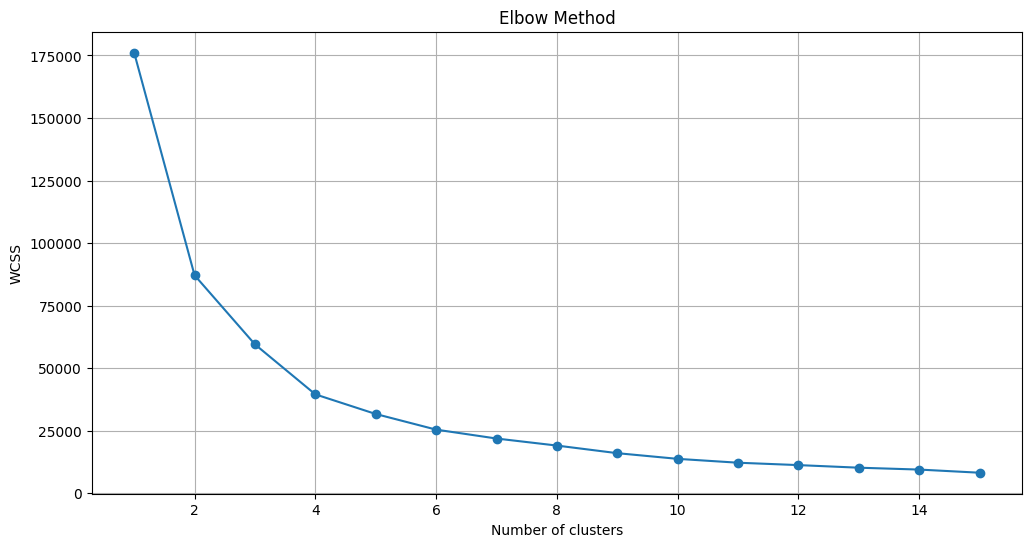

In [8]:
### Here we visualize the decreases value of wcss with cluster and we find the point where elbow occurs.
plt.figure(figsize=(12,6))
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.plot(range(1,16),wcss,marker='o')
plt.grid()
plt.show()

In [9]:
### Applying PCA to the data set
x=df.iloc[:,2:-1].values
pca=PCA(n_components=2).fit(x).transform(x)

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km=KMeans(n_clusters=4,init = 'k-means++',
                max_iter = 100, n_init = 200, random_state = 42)
y_means=km.fit_predict(pca)


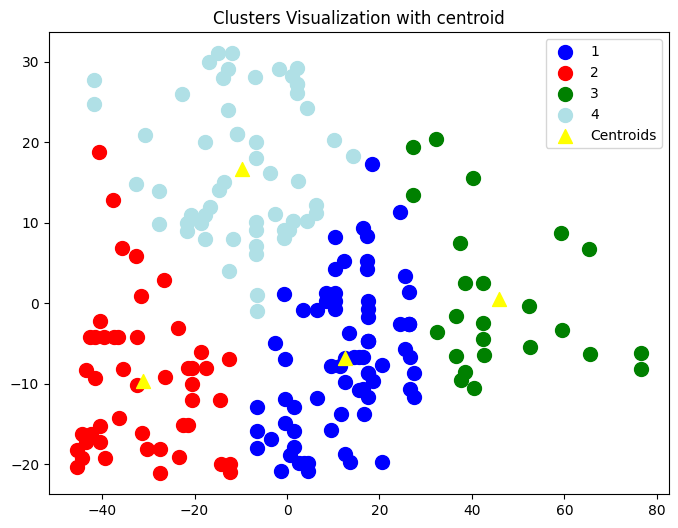

In [11]:
###Visualization of the clusters
plt.figure(figsize=(8,6))
plt.title("Clusters Visualization with centroid")
plt.scatter(pca[y_means==0,0],pca[y_means==0,1],s=100,color='blue',label = '1')
plt.scatter(pca[y_means==1,0],pca[y_means==1,1],s=100,color='red',label = '2')
plt.scatter(pca[y_means==2,0],pca[y_means==2,1],s=100,color='green', label = '3')
plt.scatter(pca[y_means==3,0],pca[y_means==3,1],s=100,color='powderblue', label = '4')
# plt.scatter(pca[y_means==4,0],pca[y_means==4,1],s=100,color='orange', label = '5')
# plt.scatter(pca[y_means==5,0],pca[y_means==5,1],s=100,color='yellow', label = '6')
##Plotting the centroid of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, marker='^',c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right')
plt.show()
